In [1]:
import kan
import kan.utils as ku
import numpy as np
import torch.nn as nn
import torch
import qutip as qt
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions

In [2]:
def rfft(x):
    x = (-1) ** np.array(x)
    return np.fft.rfft(x)[1:]

In [3]:
N=10; J1=1; J2=0
gs10 = qt.qload('../J1J2_info/N10/n10gs_J2_0.0')
gs10

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape=(1024, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00000000e+00]
 [ 1.26928255e-48]
 [-2.63794454e-18]
 ...
 [ 1.20393997e-48]
 [-2.12190686e-48]
 [ 0.00000000e+00]]

In [4]:
states, signs = utils.get_nonzero_states(N, gs10, 1e-10)
input = utils.generate_input_samples(N, states)
print(input.shape)
ft_input = []
for x in input:
    amp_phase = []
    ft = rfft(x)
    for c in ft:
        amp_phase.append(np.abs(c))
        amp_phase.append(np.angle(c) % (2 * np.pi))
    ft_input.append(amp_phase)
ft_input = torch.tensor(ft_input)
print(ft_input.shape)
msr_label = torch.tensor([magnetization.count_half_magnetization(s) for s in states]).reshape(-1, 1)
sign_label = torch.tensor(signs).reshape(-1, 1)
print(msr_label.shape, sign_label.shape)
msr_dataset = {'train_input':ft_input, 'train_label':msr_label, 'test_input':ft_input, 'test_label':msr_label}
sign_dataset = {'train_input':ft_input, 'train_label':sign_label, 'test_input':ft_input, 'test_label':sign_label}

torch.Size([252, 10])
torch.Size([252, 10])
torch.Size([252, 1]) torch.Size([252, 1])


C:\Users\taoha\AppData\Local\Temp\ipykernel_21760\59886777.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = (-1) ** np.array(x)


In [5]:
kan10 = kan.KAN(width=[10, 1, 1])
kan10.fit(sign_dataset, steps=50, lamb=1e-3);

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

| train_loss: 3.50e-03 | test_loss: 3.50e-03 | reg: 6.35e+00 | : 100%|█| 50/50 [00:07<00:00,  6.92it

saving model version 0.1


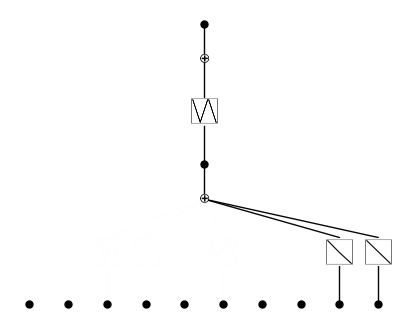

In [6]:
kan10.plot()

In [7]:
kan10 = kan10.prune()
kan10.fit(sign_dataset, lamb=1e-3, steps=20);

saving model version 0.2


| train_loss: 6.03e-04 | test_loss: 6.03e-04 | reg: 5.53e+00 | : 100%|█| 20/20 [00:03<00:00,  6.02it

saving model version 0.3


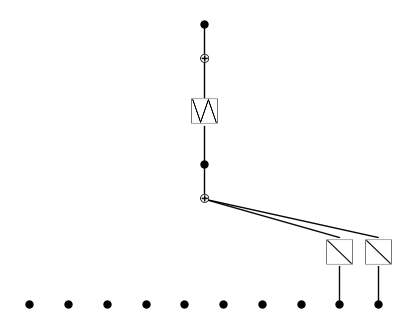

In [8]:
kan10.plot()

In [9]:
kan10.fix_symbolic(0, 8, 0, 'x');
kan10.fix_symbolic(0, 9, 0, 'x');
kan10.fix_symbolic(1, 0, 0, 'cos');
kan10.fit(sign_dataset, steps=20);

r2 is 1.0000005960464478
saving model version 0.4
r2 is 1.000001072883606
saving model version 0.5
r2 is 1.0000005960464478
saving model version 0.6


| train_loss: 8.38e-06 | test_loss: 8.38e-06 | reg: 0.00e+00 | : 100%|█| 20/20 [00:01<00:00, 17.80it

saving model version 0.7


In [10]:
ku.ex_round(kan10.symbolic_formula()[0][0], 3)

1.0*cos(1.004*x_10 + 0.787*x_9 + 7.841)

In [11]:
gs12 = qt.qload('../J1J2_info/N12/n12gs_J2_0.0')
N=12
states, signs = utils.get_nonzero_states(N, gs12, 1e-10)
input = utils.generate_input_samples(N, states)
print(input.shape)
ft_input = []
for x in input:
    amp_phase = []
    ft = rfft(x)
    for c in ft:
        amp_phase.append(np.abs(c))
        amp_phase.append(np.angle(c) % (2 * np.pi))
    ft_input.append(amp_phase)
ft_input = torch.tensor(ft_input)
print(ft_input.shape)
msr_label = torch.tensor([magnetization.count_half_magnetization(s) for s in states]).reshape(-1, 1)
sign_label = torch.tensor(signs).reshape(-1, 1)
print(msr_label.shape, sign_label.shape)
dataset12 = {'train_input':ft_input, 'train_label':sign_label, 'test_input':ft_input, 'test_label':sign_label}

torch.Size([924, 12])
torch.Size([924, 12])
torch.Size([924, 1]) torch.Size([924, 1])


C:\Users\taoha\AppData\Local\Temp\ipykernel_21760\59886777.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = (-1) ** np.array(x)


In [23]:
kan12 = kan.KAN(width=[N, 2, 1])
kan12.fit(dataset12, steps=50, lamb=1e-3);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.94e-03 | test_loss: 3.94e-03 | reg: 3.91e+00 | : 100%|█| 50/50 [00:23<00:00,  2.10it

saving model version 0.1


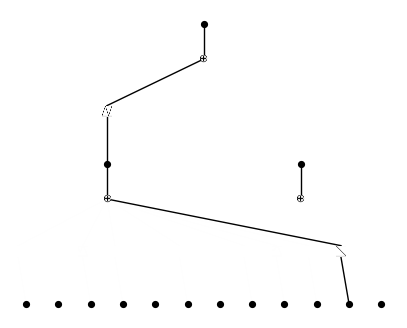

In [24]:
kan12.plot()

In [25]:
kan12.prune().width

saving model version 0.2


[[12, 0], [1, 0], [1, 0]]

In [26]:
kan12 = kan12.prune()
kan12.fit(dataset12, steps=20, lamb=1e-3);

saving model version 0.2


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 5.36e-04 | test_loss: 5.36e-04 | reg: 4.48e+00 | : 100%|█| 20/20 [00:06<00:00,  3.30it

saving model version 0.3


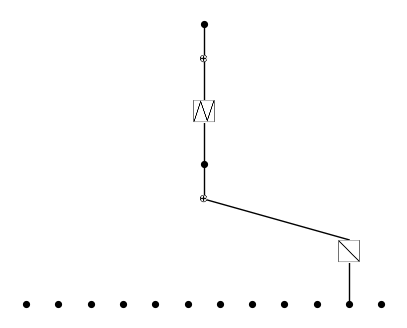

In [27]:
kan12.plot()

In [28]:
kan12.suggest_symbolic(0, 10, 0, topk=10, weight_simple=0.3);
kan12.suggest_symbolic(1, 0, 0, topk=10, weight_simple=0.3);

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0      sin    1.000001 -16.698301           2                2  -11.088811
1      cos    1.000001 -16.698301           2                2  -11.088811
2      abs    0.999991 -15.674595           3                3  -10.072216
3     sqrt    0.999973 -14.731406           2                2   -9.711984
4    x^0.5    0.999973 -14.731406           2                2   -9.711984
5     tanh    0.999973 -14.740793           3                3   -9.418555
6      tan    0.999972 -14.665119           3                3   -9.365583
7   arctan    0.999975 -14.791102           4                4   -9.153771
8  arctanh    0.999973 -14.726736           4                4   -9.108715
9    x^1.5    0.999961 -14.313898           4                4   -8.819729
   function  fitting r2    r2 loss  complexity  complexity loss  total loss
0       cos    1.000001 -16.735349           2                2  -11.114745
1       sin    1.000001

In [29]:
kan12.fix_symbolic(0, 10, 0, 'x');
kan12.fix_symbolic(1, 0, 0, 'cos');
kan12.fit(dataset12, steps=20);

Best value at boundary.
r2 is 0.9998775124549866
saving model version 0.4
r2 is 1.0000008344650269
saving model version 0.5


| train_loss: 1.60e-07 | test_loss: 1.60e-07 | reg: 0.00e+00 | : 100%|█| 20/20 [00:03<00:00,  6.47it

saving model version 0.6


In [ ]:
ku.ex_round(kan12.symbolic_formula()[0][0], 3)
# this is around -cos(x11 * 3pi/4 - pi) which makes sense as sign still flips when x11 changes by 4

-1.022*cos(2.356*x_11 - 3.352)

In [ ]:
N=10
vec = nn.Parameter(torch.randn([N, 1]))
const = nn.Parameter(torch.randn(1))
print(vec.shape, const.shape, vec.is_leaf, const.is_leaf)

torch.Size([10, 1]) torch.Size([1]) True True


In [124]:
msr_vec = torch.tensor([0] * 8 + [torch.pi/4, 1], dtype=torch.float32).reshape(-1, 1)

In [121]:
dev_gs = qt.qload('../J1J2_info/N10/n10gs_J2_0.32')
states, signs = utils.get_nonzero_states(N, dev_gs, 1e-10)
ft_input = sign_dataset['train_input']
utils.find_uniques(utils.find_sign_deviations(states, signs, sign_dataset['train_label']), N)

{31: 10, 47: 10, 55: 10, 59: 10, 61: 10, 79: 10, 121: 10}

In [125]:
torch.mean((torch.cos(ft_input @ msr_vec + torch.pi/2) - sign_dataset['train_label']) ** 2)

tensor(0.)

In [126]:
print(states[:10])
print(signs[:10])
print(sign_dataset['train_label'][:10]) # this is fine

[31, 47, 55, 59, 61, 62, 79, 87, 91, 93]
[-1, 1, -1, 1, -1, 1, -1, -1, 1, -1]
tensor([[ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1]])


In [187]:
torch.empty([N, 1]).normal_(mean=0, std=5)

tensor([[-2.1856],
        [ 0.9538],
        [ 4.3652],
        [ 7.5998],
        [10.7426],
        [-3.8492],
        [-6.0789],
        [-4.6361],
        [ 5.8603],
        [ 5.7311]])

In [204]:
# vec = nn.Parameter(torch.randn([N, 1]))
vec = nn.Parameter(torch.empty([N, 1]).normal_(mean=0, std=0.2))
const = nn.Parameter(torch.randn(1))
labels = torch.tensor(signs).reshape(-1, 1)
opt = torch.optim.LBFGS([vec,const], lr = 1)
for i in range(50):
    def closure():
        opt.zero_grad()
        pred = torch.cos(ft_input @ msr_vec + ft_input @ vec + torch.pi / 2 + const)
        loss = torch.mean((pred - labels) ** 2)
        loss.backward()
        return loss
    loss = opt.step(closure)
    if i % 5 == 0:
        print(loss.item())
print(loss.item())


2.1115875244140625
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338


In [ ]:
torch.mean((torch.cos(ft_input @ msr_vec + torch.pi / 2) - labels)** 2) # = (70 * 4) / 252

tensor(1.1111)

In [ ]:
x

In [ ]:
best_vec = #vec
best_vec

Parameter containing:
tensor([[ 7.0556e-01],
        [-8.8239e-03],
        [ 9.1221e-02],
        [-1.2233e-03],
        [-1.0812e-01],
        [-1.3412e-02],
        [-6.9132e-02],
        [ 2.9922e-03],
        [-1.4615e-01],
        [ 4.7090e-04]], requires_grad=True)

In [223]:
best_vec, const

(Parameter containing:
 tensor([[ 7.0556e-01],
         [-8.8239e-03],
         [ 9.1221e-02],
         [-1.2233e-03],
         [-1.0812e-01],
         [-1.3412e-02],
         [-6.9132e-02],
         [ 2.9922e-03],
         [-1.4615e-01],
         [ 4.7090e-04]], requires_grad=True),
 Parameter containing:
 tensor([-0.4385], requires_grad=True))

In [ ]:
pred = torch.cos(ft_input @ msr_vec + ft_input @ vec + torch.pi / 2 + const)
torch.mean((torch.sgn(pred) - labels) ** 2) # this is 2 mistakes = (4 * 2) / 252

tensor(0.0317, grad_fn=<MeanBackward0>)